In [8]:
!pip install pandas-datareader
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

     ------------------------------------ 109.5/109.5 kB 353.1 kB/s eta 0:00:00


In [9]:
print("Enter Stock Name: ")
C_name = input()

Enter Stock Name: 
AAPL


In [10]:
print("Enter Today's Date: ")
enddate = input()

Enter Today's Date: 
5/8/2023


In [20]:
df = pd.read_csv("stock.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
2,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
3,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
4,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
138,2023-07-24,121.660004,123.000000,120.980003,121.529999,121.529999,29686100
139,2023-07-25,121.360001,123.150002,121.019997,122.209999,122.209999,52509600
140,2023-07-26,130.070007,130.979996,128.320007,129.270004,129.270004,61682100
141,2023-07-27,131.669998,133.240005,128.789993,129.399994,129.399994,44952100


In [21]:
df.shape

(143, 7)

# Plotting Graph

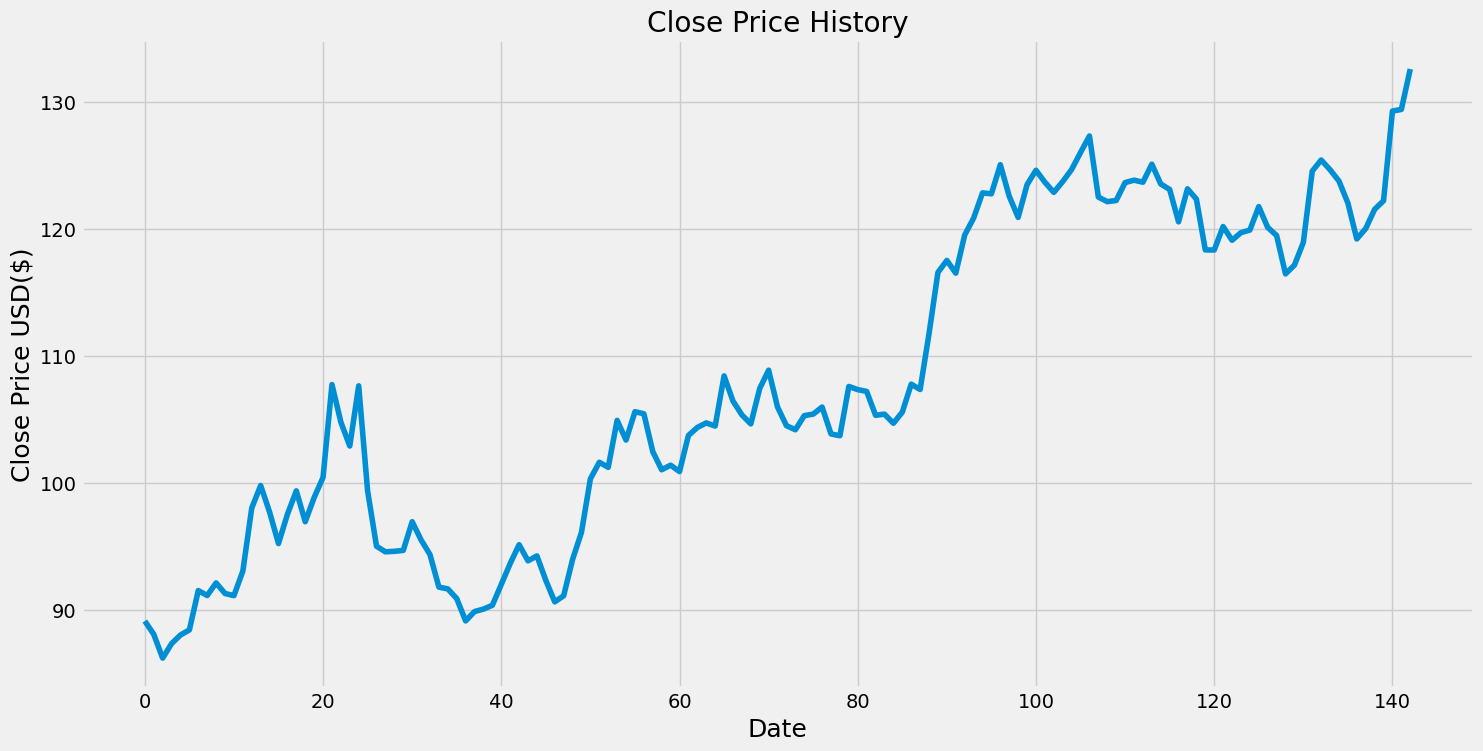

In [22]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [23]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

115

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06295829],
       [0.04053482],
       [0.        ],
       [0.02457954],
       [0.03924105],
       [0.04786548],
       [0.1147046 ],
       [0.10629581],
       [0.12764134],
       [0.10974565],
       [0.10608032],
       [0.14769308],
       [0.2548512 ],
       [0.29301428],
       [0.24795168],
       [0.19448044],
       [0.24407069],
       [0.2839587 ],
       [0.23156541],
       [0.27253121],
       [0.30681331],
       [0.46442429],
       [0.40060371],
       [0.36006906],
       [0.46226821],
       [0.2839587 ],
       [0.18995265],
       [0.18046576],
       [0.18132823],
       [0.18283747],
       [0.23156541],
       [0.20073316],
       [0.1757223 ],
       [0.12052616],
       [0.11750764],
       [0.10112121],
       [0.06317377],
       [0.07912906],
       [0.08322554],
       [0.08969391],
       [0.12505395],
       [0.16062967],
       [0.19253987],
       [0.16515746],
       [0.17356624],
       [0.13195348],
       [0.0955153 ],
       [0.105

In [25]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if(i<=60):
        print(x_train)
        print(y_train)  

[array([0.06295829, 0.04053482, 0.        , 0.02457954, 0.03924105,
       0.04786548, 0.1147046 , 0.10629581, 0.12764134, 0.10974565,
       0.10608032, 0.14769308, 0.2548512 , 0.29301428, 0.24795168,
       0.19448044, 0.24407069, 0.2839587 , 0.23156541, 0.27253121,
       0.30681331, 0.46442429, 0.40060371, 0.36006906, 0.46226821,
       0.2839587 , 0.18995265, 0.18046576, 0.18132823, 0.18283747,
       0.23156541, 0.20073316, 0.1757223 , 0.12052616, 0.11750764,
       0.10112121, 0.06317377, 0.07912906, 0.08322554, 0.08969391,
       0.12505395, 0.16062967, 0.19253987, 0.16515746, 0.17356624,
       0.13195348, 0.0955153 , 0.10586467, 0.16752918, 0.21366975,
       0.3044416 , 0.33247099, 0.32384654, 0.40362223, 0.37020276,
       0.41828372, 0.41483404, 0.35058215, 0.3197499 , 0.32751187])]
[0.31673135869648994]


In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train.shape

(55, 60)

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(55, 60, 1)

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [31]:
model.fit(x_train, y_train, batch_size=1, epochs=1)


55/55 [==============================] - 9s 28ms/step - loss: 0.0369


In [33]:
test_data = scaled_data[training_data_len-60:, :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [34]:
x_test = np.array(x_test)

In [35]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

1/1 [==============================] - 2s 2s/step


In [37]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

5.106583902090336

In [38]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


C:\Users\Zeel Dabhi\AppData\Local\Temp\ipykernel_3644\3011436284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


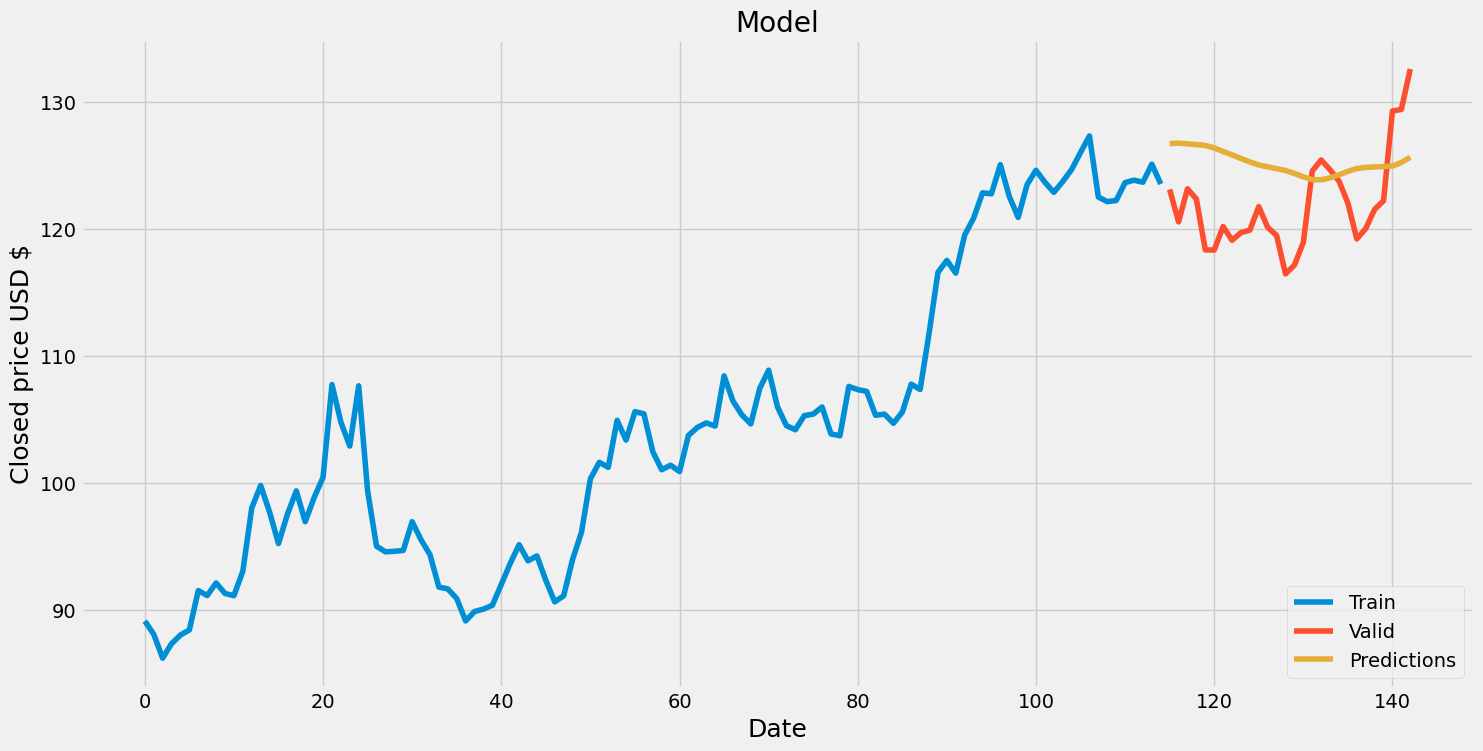

In [39]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed price USD $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid' , 'Predictions'], loc = 'lower right')
plt.show()

In [40]:
valid

,Close,Predictions
115,123.099998,126.709129
116,120.550003,126.749039
117,123.150002,126.684891
118,122.339996,126.634079
119,118.339996,126.565186
120,118.330002,126.365562
121,120.180000,126.087166
122,119.099998,125.819534
123,119.699997,125.533691
124,119.900002,125.266678


In [43]:
df = pd.read_csv("stock.csv")
new_df = df.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 38ms/step
[[126.24359]]


In [44]:
df = pd.read_csv("stock.csv")
print(df['Close'])

0       89.120003
1       88.080002
2       86.199997
3       87.339996
4       88.019997
          ...    
138    121.529999
139    122.209999
140    129.270004
141    129.399994
142    132.580002
Name: Close, Length: 143, dtype: float64
